In [171]:
import scoringAlgorithm.classes as classes
reload(classes)

<module 'scoringAlgorithm.classes' from '/Users/annie/Desktop/Scoring Algorithm/scoringAlgorithm/classes.py'>

In [172]:
from tkinter import Tk
from tkinter import filedialog
### Get filepaths
Tk().withdraw()
dirselect = filedialog.Directory()
dirs = []
while True:
    d = dirselect.show(initialdir = "/Volumes/SharedX/Neuro-Leventhal/data/Skilled Reaching/DLC output",title = "Select rat folder")
    if not d: break
    dirs.append(d)
print(dirs)

['/Users/annie/Desktop/Scoring Algorithm/R0159', '/Users/annie/Desktop/Scoring Algorithm/R0158']


In [173]:
import time

## Create object with dataset
time1 = time.time()
Rat1 = classes.Rat(dirs[0])
Rat2 = classes.Rat(dirs[1])
time2 = time.time()
print(time2-time1)

31.790812969207764


In [177]:
trainData1, testData1, trainLabel1, testLabel1 = Rat1.trainingSet(True)
trainData2, testData2, trainLabel2, testLabel2 = Rat2.trainingSet(True)
trainData = trainData1 + trainData2
testData = testData1 + testData2
trainLabel = trainLabel1 + trainLabel2
testLabel = testLabel1 + testLabel2

In [178]:
## k-NN classifier
from sklearn.neighbors import KNeighborsClassifier as kNN
classifier = kNN(n_neighbors = 3,weights = 'distance')
classifier.fit(trainData,trainLabel)

print('Training score is: %f'% classifier.score(trainData,trainLabel))
print('Test score is: %f'%classifier.score(testData,testLabel))

Training score is: 1.000000
Test score is: 0.652850


In [132]:
#SGD classifier - perceptron
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", penalty="l2", max_iter=5)
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 0.906780
Test score is: 0.743590


In [103]:
#SGD classifier - hinge
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 0.938559
Test score is: 0.739316


In [133]:
#SGD classifier - log
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)
clf.fit(trainData,trainLabel)


print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 0.917373
Test score is: 0.713675


In [134]:
#SGD classifier - modified_huber
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5)
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 0.932203
Test score is: 0.760684


In [135]:
#SGD classifier - squared_hinge
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="squared_hinge", penalty="l2", max_iter=5)
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 0.870763
Test score is: 0.713675


In [136]:
#SVC classifier
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 1.000000
Test score is: 0.871795


In [137]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SGDClassifier(loss="perceptron", penalty="l2", max_iter=5),n_estimators=100, random_state=0)
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 0.953390
Test score is: 0.803419


In [138]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(trainData,trainLabel)

print('Training score is: %f'% clf.score(trainData,trainLabel))
print('Test score is: %f'%clf.score(testData,testLabel))

Training score is: 1.000000
Test score is: 0.863248


In [111]:
import sklearn
from imp import reload

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


# Widget

In [ ]:
#make trial inherit QWidget, then make all of these 
import sys
from PyQt5.QtWidgets import QWidget, QCheckBox, QApplication, QPushButton
from PyQt5.QtCore import Qt

class Example(QWidget):

    def __init__(self):
        #Not going to want this to start every time  I init a trial,
        #would be a nightmare. Only create the widget if explicitly asked
        super().__init__()

        self.features2Plot = set()
        self.initUI()

    def initUI(self):

        cb = QCheckBox('Left MCP1', self)
        cb.move(20, 20)
        cb.toggle()
        cb.stateChanged.connect(self.includeFeatures)
        
        ext = QPushButton("Close", self)
        ext.clicked.connect(self.closeEvent)

        self.setGeometry(300, 300, 350, 250)
        self.setWindowTitle('Select Features to Plot')
        self.show()
        
    def closeEvent(self):
        self.isVisible = False
        return self.features2Plot

    def includeFeatures(self, state):

        if state == Qt.Checked:
            self.features2Plot.add('leftmcp1x')
            self.features2Plot.add('leftmcp1y')
            self.features2Plot.add('leftmcp1p')

def main():
    app = QApplication(sys.argv)
    ex = Example()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

In [ ]:
import sys
from PyQt5.QtWidgets import (QApplication, QWidget, QMessageBox)

class MainWindow(QWidget):
	def __init__(self):
		super().__init__()

	def closeEvent(self, event):
		reply = QMessageBox.question(self, 'Window Close', 'Are you sure you want to close the window?',
				QMessageBox.Yes | QMessageBox.No, QMessageBox.No)

		if reply == QMessageBox.Yes:
			event.accept()
			print('Window closed')
		else:
			event.ignore()

if __name__ == '__main__':
	app = QApplication(sys.argv)

	demo = MainWindow()
	demo.show()

	sys.exit(app.exec_())

****

# Old

## Trying things out w/preprocessing

In [315]:
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np

#Random idea - what if I did PCA on features, then did transpose and performed PCA on time series?
#Should ID most important features and most important frames

features1, labels1 = trainingSet(Rat1,False)
features2, labels2 = trainingSet(Rat1,True)

success = []
success.append(Rat1.sessions['20170504'].trials[2].data.drop(0,axis='rows') )
failure = []
failure.append(Rat1.sessions['20170504'].trials[3].data.drop(0,axis='rows') )

In [243]:
type(features1)

list

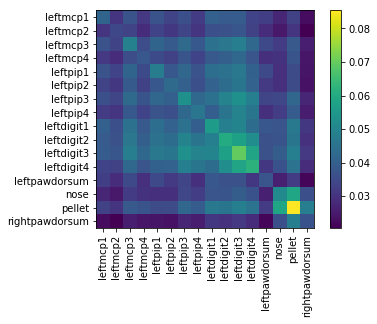

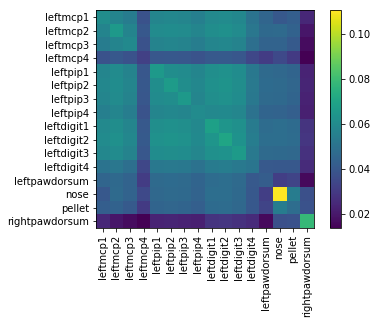

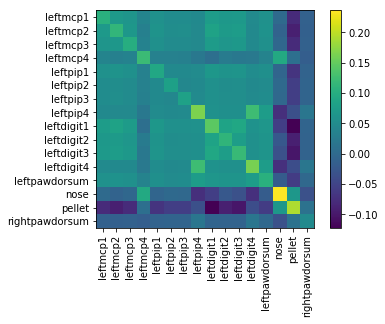

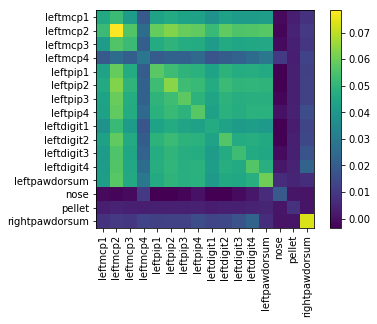

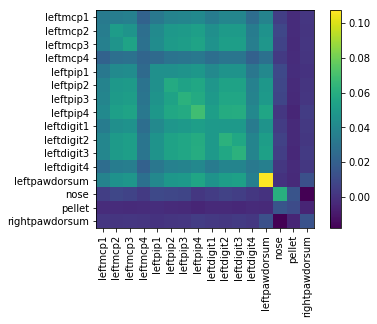

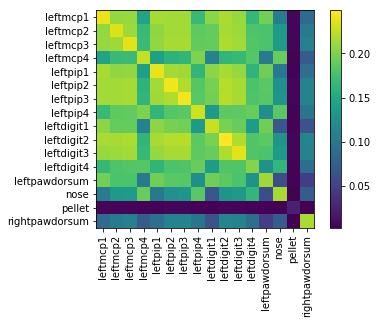

In [342]:
X = getX(success)
Y = getY(success)
P = getP(success)

showCov(X,Y,P)

X2 = getX(failure)
Y2 = getY(failure)
P2 = getP(failure)

showCov(X2,Y2,P2)

In [283]:
def getX(features):
    x_features = []
    for i in features:
        x = i[['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
            'leftpip1','leftpip2','leftpip3','leftpip4',
            'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
            'leftpawdorsum','nose','pellet','rightpawdorsum']]
        x_features.append(x)
    x_scaledFeatures = x_features
    l = len(x_scaledFeatures)
    for i in range(l):
        x_scaledFeatures[i] = scale(x_scaledFeatures[i])
    return x_features


def getY(features):
    y_features = []
    for i in features:
        y = i[['leftmcp1.1','leftmcp2.1','leftmcp3.1','leftmcp4.1',
            'leftpip1.1','leftpip2.1','leftpip3.1','leftpip4.1',
            'leftdigit1.1','leftdigit2.1','leftdigit3.1','leftdigit4.1',
            'leftpawdorsum.1','nose.1','pellet.1','rightpawdorsum.1']]
        y_features.append(y)
    y_scaledFeatures = y_features
    l = len(y_scaledFeatures)
    for i in range(l):
        y_scaledFeatures[i] = scale(y_scaledFeatures[i])
    return y_features


def getP(features):
    p_features = []
    for i in features:
        p = i[['leftmcp1.2','leftmcp2.2','leftmcp3.2','leftmcp4.2',
            'leftpip1.2','leftpip2.2','leftpip3.2','leftpip4.2',
            'leftdigit1.2','leftdigit2.2','leftdigit3.2','leftdigit4.2',
            'leftpawdorsum.2','nose.2','pellet.2','rightpawdorsum.2']]
        p_features.append(p)
        p_scaledFeatures = p_features
    l = len(p_scaledFeatures)
    for i in range(l):
        p_scaledFeatures[i] = scale(p_scaledFeatures[i])
    return p_features

In [341]:
#Show covariance matrix
def showCov(X,Y,P):
    from sklearn.decomposition import PCA, IncrementalPCA
    decomp1 = IncrementalPCA(n_components=3)
    for trial in X:
        decomp = decomp1.partial_fit(trial)
        break
        #cov2 = decomp.get_covariance(decomp_trial)

    decomp_trial = decomp1.transform(trial)
    cov1 = decomp1.get_covariance()

    plt.imshow(cov1)
    plt.colorbar()
    plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
                'leftpip1','leftpip2','leftpip3','leftpip4',
                'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
                'leftpawdorsum','nose','pellet','rightpawdorsum'],rotation=90) 
    plt.yticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
                'leftpip1','leftpip2','leftpip3','leftpip4',
                'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
                'leftpawdorsum','nose','pellet','rightpawdorsum'],rotation=0) 
    plt.show()

    decomp2 = IncrementalPCA(n_components=3)
    for trial in Y:
        decomp = decomp2.partial_fit(trial)
        break

    decomp_trial = decomp2.transform(trial)
    cov1 = decomp2.get_covariance()

    plt.imshow(cov1)
    plt.colorbar()
    plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
                'leftpip1','leftpip2','leftpip3','leftpip4',
                'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
                'leftpawdorsum','nose','pellet','rightpawdorsum'],rotation=90) 
    plt.yticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
                'leftpip1','leftpip2','leftpip3','leftpip4',
                'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
                'leftpawdorsum','nose','pellet','rightpawdorsum'],rotation=0) 
    plt.show()
    
    decomp2 = IncrementalPCA(n_components=3)
    for trial in P:
        decomp = decomp2.partial_fit(trial)
        break

    decomp_trial = decomp2.transform(trial)
    cov1 = decomp2.get_covariance()

    plt.imshow(cov1)
    plt.colorbar()
    plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
                'leftpip1','leftpip2','leftpip3','leftpip4',
                'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
                'leftpawdorsum','nose','pellet','rightpawdorsum'],rotation=90) 
    plt.yticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['leftmcp1','leftmcp2','leftmcp3','leftmcp4',
                'leftpip1','leftpip2','leftpip3','leftpip4',
                'leftdigit1','leftdigit2','leftdigit3','leftdigit4',
                'leftpawdorsum','nose','pellet','rightpawdorsum'],rotation=0) 
    plt.show()


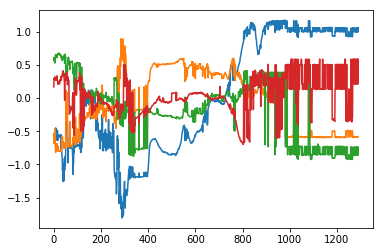

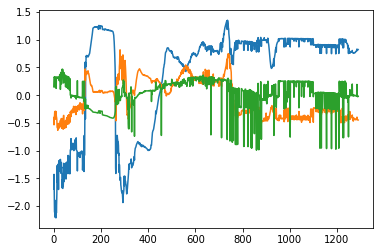

In [277]:
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np

decomp = IncrementalPCA(n_components=4)
count = 0
cov2 = 0
for trial in scaledFeatures:
    if count == 2:
        test_trial = trial
    
    decomp = decomp.partial_fit(trial)
    decomp_trial = decomp.transform(test_trial)
    if count == 2:
        first = decomp_trial
    #print(decomp_trial)
    #cov = decomp.get_covariance()
    #plt.plot(trial)
    #plt.plot(decomp_trial)
    #plt.show()
    count += 1
    if count == 1000:
        last = decomp_trial
        break
        
plt.plot(first)
plt.show()
plt.plot(last)
plt.show()
    

In [38]:
from sklearn.neighbors import KNeighborsClassifier as kNN
classifier = kNN(n_neighbors = 3)
#classifier.fit(x,y)

In [ ]:
# Not accounting for time
# Using extraneous data, 

In [125]:
trial_arr = []
for trial in R0195.sessions[0].trials:
    trial_arr.append(int(trial))
    
trial_arr.sort()
print(trial_arr)
print(R0195.sessions[0].date)

['002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '018', '019', '020', '021', '022', '024', '025', '026', '028', '029', '030', '031', '032', '034', '035', '037', '038', '039', '040', '041', '043', '044', '045', '047', '048', '050', '051', '052', '053', '055', '056', '057', '058', '059', '061', '062', '063', '064', '066', '067', '068', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '082', '083', '085', '086', '088', '089', '090', '091']
20170503


In [69]:
R0195.labels = R0195.labels.rename(columns={'Unnamed: 0': 'Trial Num'})
R0195.labels.set_index('Trial Num')

,1/23/17,1/24/17,1/25/17,1/26/17,1/27/16,1/30/17,1/31/17,2/1/17,2/2/17,2/3/17,...,5/17/17,5/18/17,5/19/17,5/20/17,5/21/17,5/23/17,5/24/17,5/25/17,5/27/17,5/28/17
Trial Num,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,occluded,occluded,occluded,occluded,occluded,occluded,occluded,occluded,occluded,occluded
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.0,NaN,NaN,0.0,4.0,4.0,4.0,4.0,7.0,1.0,...,4,1,3,0,1,1,0,1,1,1
3.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,...,NaN,4,4,1,4,1,1,1,7,4
4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,...,4,1,1,4,1,4,4,4,4,4
5.0,NaN,7.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,...,1,1,4,1,NaN,1,4,7,1,4
6.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,...,1,NaN,NaN,1,1,4,NaN,7,4,NaN
7.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,...,2,4,1,1,4,1,1,1,4,1
8.0,4.0,4.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0,...,4,1,4,NaN,4,4,4,1,1,2


In [58]:
R0195.labels['1/23/17'].values

0      NaN
1      NaN
2      0.0
3      4.0
4      4.0
5      NaN
6      4.0
7      4.0
8      4.0
9      NaN
10     7.0
11     NaN
12     4.0
13     1.0
14     4.0
15     4.0
16     4.0
17     1.0
18     4.0
19     4.0
20     1.0
21     1.0
22     4.0
23     4.0
24     1.0
25     1.0
26     1.0
27     4.0
28     4.0
29     4.0
      ... 
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN
91     NaN
92     NaN
93     NaN
94     NaN
95     NaN
96     NaN
97     NaN
98     NaN
99     NaN
100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107    NaN
108    NaN
Name: 1/23/17, Length: 109, dtype: float64

In [ ]:
R0195.sessions[0].trials[0]

In [ ]:
R0195.sessions[0].trials[0].trialNum

****

In [8]:
#Doesn't allow selection of multiple files
from tkinter import filedialog
from tkinter import *

#Choose rat
root = Tk()
root.directory =  filedialog.askdirectory(initialdir = "/Volumes/SharedX/Neuro-Leventhal/data/Skilled Reaching/DLC output",title = "Select rat folder")
print (root.directory)

In [38]:
import time

In [22]:
filenameString = 'R0184_20170831_11-58-54_002_directDeepCut_resnet50_reachingd_l_gpbyrJan4shuffle1_1030000.csv'
directoryString = 'sampleData/R0184_20170831/R0184_20170831_direct/'

#Previous code read from folders to get filenames. Reading the filenames took a very long time.
#This might have actually been the rate limiting step.

In [19]:
filenameString[24:27]

'002'

In [39]:
time1 = time.time()
import csv
import numpy as np
with open(directoryString+filenameString, newline='') as csvfile:
    kinematics = csv.reader(csvfile)
    kinematics1 = list(kinematics)
    kinematics2 = np.asarray(kinematics1)
    features = kinematics2[3:,1:]
    
time2 = time.time()
print(time2-time1)

0.06577301025390625


In [41]:
time1 = time.time()
import pandas as pd
df = pd.read_csv(directoryString+filenameString,header=1)
time2 = time.time()
print(time2-time1)

0.0782010555267334


In [73]:
a = df.set_index('bodyparts')

In [52]:
a[0:2]

0                     y
1    380.83369344472885
Name: leftmcp1.1, dtype: object

In [60]:
b = np.asarray(a)[1:]

In [61]:
b

array(['380.83369344472885', '381.156898021698', '381.1041370630264', ...,
       '401.9254186153412', '401.00627303123474', '399.6427655220032'],
      dtype=object)

In [ ]:
class trialData:
    
    def readFile(self,filenameString):
        
        self.rat = filenameString[0:5]
        self.date = filenameString[6:14]
        self.trialNum = filenameString[24:27]
        self.labels = [] # Do I want this to be part of the class?
                         # What if I have an unlabelled dataset?
        self.features = [] #This should probably be more complex than an array
                           #Also should be easily converted to array
        
        #Do this somewhere else
        import csv
        with open(filenameString, newline='') as csvfile:
                kinematics = list(csv.reader(csvfile))
                kinematics = np.asarray(kinematics)
                features = kinematics[3:,1:]
                
        

#training and test data need to be given to classifier and PCA as numpy arrays

In [63]:
class features:
    
    def getFeatures(self,filenameString):
        import pandas as pd
        df = pd.read_csv(directoryString+filenameString,header=1)
        
        #maybe make coordinate class so there doesnt have to be 3 of something
        self.lmcp1x = np.asarray(df['leftmcp1'])[1:]
        self.lmcp1y = np.asarray(df['leftmcp1.1'])[1:]
        self.lmcp1p = np.asarray(df['leftmcp1.2'])[1:]
        self.lmcp2x = np.asarray(df['leftmcp2'])[1:]
        self.lmcp2y = np.asarray(df['leftmcp2.1'])[1:]
        self.lmcp2p = np.asarray(df['leftmcp2.2'])[1:]
        self.lmcp3x = np.asarray(df['leftmcp3'])[1:]
        self.lmcp3y = np.asarray(df['leftmcp3.1'])[1:]
        self.lmcp3p = np.asarray(df['leftmcp3.2'])[1:]
        self.lmcp4x = np.asarray(df['leftmcp4'])[1:]
        self.lmcp4y = np.asarray(df['leftmcp4.1'])[1:]
        self.lmcp4p = np.asarray(df['leftmcp4.2'])[1:]
        
        self.lpip1x = np.asarray(df['leftpip1'])[1:]
        self.lpip1y = np.asarray(df['leftpip1.1'])[1:]
        self.lpip1p = np.asarray(df['leftpip1.2'])[1:]
        self.lpip2x = np.asarray(df['leftpip2'])[1:]
        self.lpip2y = np.asarray(df['leftpip2.1'])[1:]
        self.lpip2p = np.asarray(df['leftpip2.2'])[1:]
        self.lpip3x = np.asarray(df['leftpip3'])[1:]
        self.lpip3y = np.asarray(df['leftpip3.1'])[1:]
        self.lpip3p = np.asarray(df['leftpip3.2'])[1:]
        self.lpip4x = np.asarray(df['leftpip4'])[1:]
        self.lpip4y = np.asarray(df['leftpip4.1'])[1:]
        self.lpip4p = np.asarray(df['leftpip4.2'])[1:]
        
        self.ldig1x = np.asarray(df['leftdigit1'])[1:]
        self.ldig1y = np.asarray(df['leftdigit1.1'])[1:]
        self.ldig1p = np.asarray(df['leftdigit1.2'])[1:]
        self.ldig2x = np.asarray(df['leftdigit2'])[1:]
        self.ldig2y = np.asarray(df['leftdigit2.1'])[1:]
        self.ldig2p = np.asarray(df['leftdigit2.2'])[1:]
        self.ldig3x = np.asarray(df['leftdigit3'])[1:]
        self.ldig3y = np.asarray(df['leftdigit3.1'])[1:]
        self.ldig3p = np.asarray(df['leftdigit3.2'])[1:]
        self.ldig4x = np.asarray(df['leftdigit4'])[1:]
        self.ldig4y = np.asarray(df['leftdigit4.1'])[1:]
        self.ldig4p = np.asarray(df['leftdigit4.2'])[1:]
        
        self.lpdorsumx = np.asarray(df['leftpawdorsum'])[1:]
        self.lpdorsumy = np.asarray(df['leftpawdorsum1'])[1:]
        self.lpdorsump = np.asarray(df['leftpawdorsum2'])[1:]
        
        self.nosex = np.asarray(df['nose'])[1:]
        self.nosey = np.asarray(df['nose1'])[1:]
        self.nosep = np.asarray(df['nose2'])[1:]
        
        self.pelletx = np.asarray(df['pellet'])[1:]
        self.pellety = np.asarray(df['pellet1'])[1:]
        self.pelletp = np.asarray(df['pellet2'])[1:]
        
        self.rpawx = np.asarray(df['rightpaw'])[1:]
        self.rpawy = np.asarray(df['rightpaw1'])[1:]
        self.rpawp = np.asarray(df['rightpaw2'])[1:]

In [ ]:
#Create training set
# R/L pp rats to start


In [ ]:
#Create test set

## Importing Pickle Files

In [4]:
import pickle as pkl
data = pkl.load(open('sampleData/R0195/R0195_20170620_11-44-41_004_directDeepCut_resnet50_reaching_direct_rightAug23shuffle1_850000includingmetadata.pickle','rb'))

In [10]:
type(data)

dict

In [8]:
data

{'data': {'start': 1583507652.7709663,
  'Scorer': 'DeepCut_resnet50_reaching_direct_rightAug23shuffle1_850000',
  'nframes': 1291,
  'fps': 300.0,
  'run_duration': 48.4920871257782,
  'stop': 1583507701.2630534,
  'frame_dimensions': (550, 600),
  'config file': {'weight_decay': 0.0001,
   'log_dir': 'log',
   'mean_pixel': [123.68, 116.779, 103.939],
   'dataset': '../../UnaugmentedDataSet_reaching_direct_rightAug23/reaching_direct_right_ASB90shuffle1.mat',
   'location_refinement': True,
   'init_weights': '..\\pose-tensorflow\\models\\reaching_direct_rightAug23-trainset90shuffle1\\train\\snapshot-850000',
   'scoremap_dir': 'test',
   'dataset_type': 'default',
   'mirror': False,
   'batch_size': 1,
   'crop_pad': 0,
   'intermediate_supervision_layer': 12,
   'weigh_only_present_joints': False,
   'all_joints': [[0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [8],
    [9],
    [10],
    [11],
    [12],
    [13],
    [14],
    [15]],
   'global_scale': 0.8